In [1]:
# Cross-entropy Loss with L1 Regularization

In [2]:
# Import libraries

import numpy as np               
import matplotlib.pyplot as plt 
import tensorflow as tf          
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split 
import os                        
import cv2                     
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2

In [3]:
# Collect and preprocess data

req_height = 64
req_width = 64
channels = 3

def load_and_preprocess_data(data_dir, image_size=(req_height, req_width)):
    data = []
    labels = []

    for folder_name in os.listdir(data_dir):
        label = 1 if folder_name == 'faces' else 0
        folder_path = os.path.join(data_dir, folder_name)

        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, image_size)
            img = img.astype("float32") / 255.0
            data.append(img)
            labels.append(label)   

    data = np.array(data)
    labels = np.array(labels)

    return data, labels

data_dir = 'dataset'
data, labels = load_and_preprocess_data(data_dir)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (2560, 64, 64, 3)
Labels shape: (2560,)


In [4]:
# Split the dataset

x_train, x_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [5]:
# Create a neural network model

model = Sequential([
    Flatten(input_shape=(req_width, req_height, channels)),
    Dense(256, activation='sigmoid', kernel_regularizer=l1(0.001)),  # Hidden layer 1
    Dense(128, activation='sigmoid', kernel_regularizer=l1(0.001)),  # Hidden layer 2
    Dense(1, activation='sigmoid', kernel_regularizer=l1(0.001))     # Output layer (binary classification)
])

In [6]:
# Compile the model with hinge loss or cross-entropy loss

# a) Hinge loss
# model.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])

# b) Cross-entropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model

train_loss_values = []
train_accuracy_values = []
validation_loss_values = []
validation_accuracy_values = []
test_loss_values = []
test_accuracy_values = []
epochs = []

num_epochs = 20

for epoch in range(num_epochs):
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=1)

    train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
    validation_loss, validation_accuracy = model.evaluate(x_val, y_val, verbose=0)
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    
    train_loss_values.append(train_loss)
    train_accuracy_values.append(train_accuracy)
    validation_loss_values.append(validation_loss)
    validation_accuracy_values.append(validation_accuracy)
    test_loss_values.append(test_loss)    
    test_accuracy_values.append(test_accuracy)
    epochs.append(epoch + 1)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Validation Loss: {validation_loss:.4f}, Validation Accuracy: {validation_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

56/56 [==============================] - 6s 72ms/step - loss: 9.6270 - accuracy: 0.6088 - val_loss: 2.6122 - val_accuracy: 0.6406
Epoch 1/20, Train Loss: 2.6212, Train Accuracy: 0.6127, Validation Loss: 2.6122, Validation Accuracy: 0.6406, Test Loss: 2.6249, Test Accuracy: 0.6016
56/56 [==============================] - 4s 65ms/step - loss: 2.1122 - accuracy: 0.6088 - val_loss: 1.7574 - val_accuracy: 0.6406
Epoch 2/20, Train Loss: 1.7660, Train Accuracy: 0.6127, Validation Loss: 1.7574, Validation Accuracy: 0.6406, Test Loss: 1.7680, Test Accuracy: 0.6016
56/56 [==============================] - 4s 64ms/step - loss: 1.5747 - accuracy: 0.6105 - val_loss: 1.3801 - val_accuracy: 0.6406
Epoch 3/20, Train Loss: 1.3973, Train Accuracy: 0.6127, Validation Loss: 1.3801, Validation Accuracy: 0.6406, Test Loss: 1.4031, Test Accuracy: 0.6016
56/56 [==============================] - 4s 65ms/step - loss: 1.2890 - accuracy: 0.6127 - val_loss: 1.1910 - val_accuracy: 0.6406
Epoch 4/20, Train Loss: 1.2

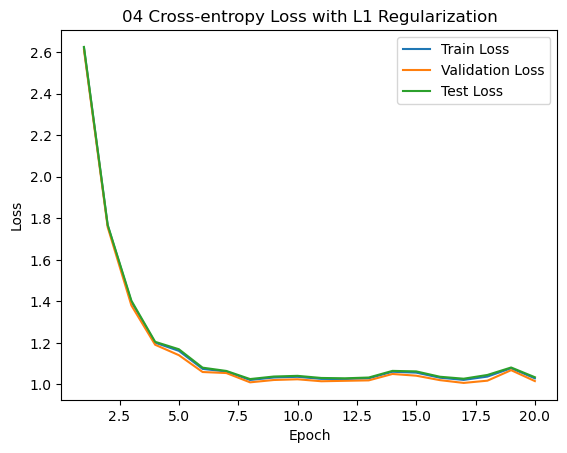

In [8]:
# Plot the training, validation, and test loss values

plt.plot(epochs, train_loss_values, label='Train Loss')
plt.plot(epochs, validation_loss_values, label='Validation Loss')
plt.plot(epochs, test_loss_values, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('04 Cross-entropy Loss with L1 Regularization')
plt.savefig('04_Cross_entropy_loss_L1_regularization.png')
plt.show()

In [9]:
# Save the trained model

model.save("04_Cross_entropy_loss_L1_regularization.keras")